In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import os
import glob
from glob import glob
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import cv2
import random
from matplotlib import pyplot as plt
from keras.models import Sequential
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.decomposition import PCA

data_dir = os.chdir(r'C:\Users\admin\OneDrive - 한양대학교\dataset\image\cw_data')
data_list = glob('*.jpg')
print(data_list[13999:14005])
print(text_to_word_sequence(data_list[0]))


['LOS_9_7.jpg', 'NLOS_1000_1.jpg', 'NLOS_1000_2.jpg', 'NLOS_1000_3.jpg', 'NLOS_1000_4.jpg', 'NLOS_1000_5.jpg']
['los', '1000', '1', 'jpg']


In [3]:
label = []
data_height = 32
data_width =32
channel_n = 3
batch_size = len(data_list)
images = np.zeros((batch_size, data_height, data_width, channel_n))
for n, path in enumerate(data_list[:batch_size]):
# lable 
    token = text_to_word_sequence(data_list[n])
    label.append(token[0])
# image transform
    image = cv2.imread(data_list[n])
    image = cv2.resize(image, (32, 32))/255
    images[n, :, :, :] =image


In [249]:
label = np.array(label)
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)
label_encoded = keras.utils.to_categorical(encoder.transform(items))

X =images
y = label_encoded

X_train=np.concatenate([X[0:10500],X[14000:24500]])
y_train=np.concatenate([y[0:10500],y[14000:24500]])
X_val=np.concatenate([X[10500:12250],X[24500:26250]])
y_val=np.concatenate([y[10500:12250],y[24500:26250]])
X_test=np.concatenate([X[12250:14000],X[26250:]])
y_test=np.concatenate([y[12250:14000],y[26250:]])

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(21000, 32, 32, 3)
(21000, 2)
(3500, 32, 32, 3)
(3500, 2)
(3500, 32, 32, 3)
(3500, 2)


In [250]:
model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 4, 4, 32)          18464     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
dropout_21 (Dropout)         (None, 2, 2, 32)        

In [251]:
adam = keras.optimizers.Adam(lr=0.001)
es = [EarlyStopping(monitor ='val_loss',mode='min',patience =20), ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val),callbacks=[es])

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
329/329 [==============================] - 24s 71ms/step - loss: 0.5298 - accuracy: 0.7285 - val_loss: 0.4568 - val_accuracy: 0.7791
Epoch 2/10
329/329 [==============================] - 22s 67ms/step - loss: 0.4735 - accuracy: 0.7717 - val_loss: 0.4494 - val_accuracy: 0.7846
Epoch 3/10
329/329 [==============================] - 22s 67ms/step - loss: 0.4680 - accuracy: 0.7742 - val_loss: 0.4454 - val_accuracy: 0.7897
Epoch 4/10
329/329 [==============================] - 22s 67ms/step - loss: 0.4599 - accuracy: 0.7794 - val_loss: 0.4388 - val_accuracy: 0.7923
Epoch 5/10
329/329 [==============================] - 22s 68ms/step - loss: 0.4563 - accuracy: 0.7835 - val_loss: 0.4431 - val_accuracy: 0.7917
Epoch 6/10
329/329 [==============================] - 22s 67ms/step - loss: 0.4539 - accuracy: 0.7837 - val_loss: 0.4334 - val_accuracy: 0.7946
Epoch 7/10
329/329 [==============================] - 22s 67ms/step - loss: 0.4496 - accuracy: 0.7865 - val_loss: 0.4326 - val_accuracy:

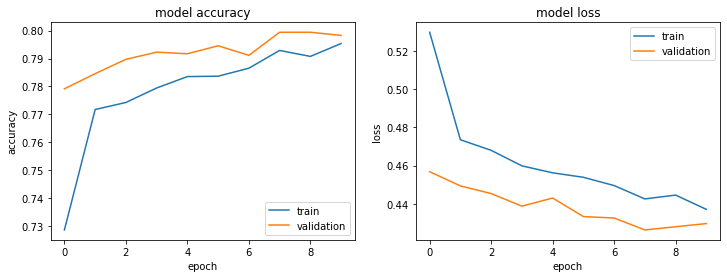

In [252]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [253]:
import seaborn as sns
from tensorflow.keras import backend as K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred-0.5)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

#knn evaluation_process
layerIndex = 8
func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
X_train2 = func([X_train])  # input_data is a numpy array
X_test2 = func([X_test])  # input_data is a numpy array
X_val2 = func([X_val])

X_train2 =sklearn.preprocessing.normalize(X_train2, norm='l2', axis=1, copy=True, return_norm=False)
X_test2 =sklearn.preprocessing.normalize(X_test2, norm='l2', axis=1, copy=True, return_norm=False)
X_val2 = sklearn.preprocessing.normalize(X_val2, norm='l2', axis=1, copy=True, return_norm=False)

X_train2 = np.concatenate([X_train2, X_val2])
y_train2 = np.concatenate([y_train, y_val])


55/55 [==============================] - 1s 15ms/step - loss: 0.4401 - accuracy: 0.7960


In [260]:
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=1000)
classifier.fit(X_train2, y_train2)

y_pred2 = classifier.predict(X_test2)
y_pred2 = np.ceil(y_pred2-0.5)

acc_cnn = accuracy_score(y_test,y_pred)
acc_knn= accuracy_score(y_test,y_pred2)

print(acc_cnn)
print(acc_knn)
print(X_train2.shape)

0.796
0.796
(24500, 32)


              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1750
           1       0.86      0.73      0.79      1750

   micro avg       0.81      0.81      0.81      3500
   macro avg       0.81      0.81      0.80      3500
weighted avg       0.81      0.81      0.80      3500
 samples avg       0.81      0.81      0.81      3500

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1750
           1       0.88      0.71      0.79      1750

   micro avg       0.81      0.81      0.81      3500
   macro avg       0.82      0.81      0.81      3500
weighted avg       0.82      0.81      0.81      3500
 samples avg       0.81      0.81      0.81      3500



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

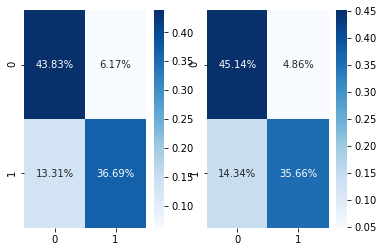

In [138]:
cf_matrix2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))

fig, ax = plt.subplots(1,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Blues' ,ax=ax[0])
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, fmt = '.2%', cmap='Blues',ax=ax[1])